In [18]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt

from helpers import *
from implementations import *
from plots import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the Data
Note that `ratings` is a sparse matrix that in the shape of (num_items, num_users)

In [2]:
path_dataset = "data_train.csv"
ratings = load_data(path_dataset)
ratings.shape

number of items: 10000, number of users: 1000


(10000, 1000)

## Exploratory Data Analysis

### Calculate mean and std per user

In [6]:
user_means, user_stds = calculate_statistics_per_user(ratings)

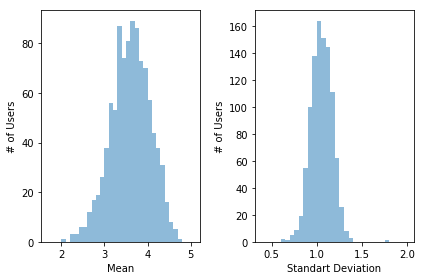

Total number of nonzero elements in origial data:1176952


In [27]:
plot_mean_and_std_per_user(user_means, user_stds)
print("Total number of nonzero elements in origial data:{v}".format(v=ratings.nnz))

### Plot the number of ratings per movie and user

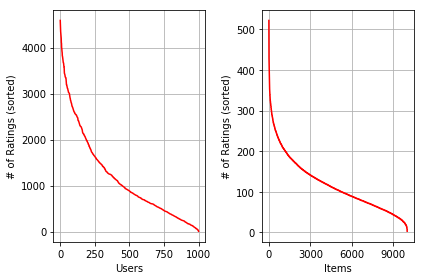

min # of items per user = 8, min # of users per item = 3.


In [28]:
num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

## Spliting the data into a train and test set

the shape of original ratings. (# of row, # of col): (10000, 1000)
the shape of valid ratings. (# of row, # of col): (9990, 999)
Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1065253
Total number of nonzero elements in test data:111620


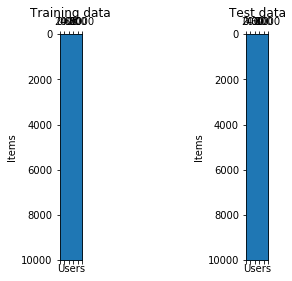

In [9]:
valid_ratings, train, test = split_data(
    ratings, num_items_per_user, num_users_per_item, min_num_ratings=10, p_test=0.1)
plot_train_test_data(train, test)

## Implementing Baselines 

### Use the global mean to do the prediction

In [16]:
baseline_global_mean(train, test)

test RMSE of baseline using the global mean: [[1.12152228]].


### Use the user means as the prediction

In [17]:
baseline_user_mean(train, test)

test RMSE of the baseline using the user mean: [[1.03317038]].


### Use the item means as the prediction

In [18]:
baseline_item_mean(train, test)

test RMSE of the baseline using the item mean: [[1.09633198]].


## Learning the Matrix Factorization using SGD

In [102]:
# Hyperparameters
gamma = 0.01
num_features = 20   # K in the lecture notes
lambda_user = 0.1
lambda_item = 0.7
num_epochs = 20     # number of full passes through the train set

matrix_factorization_SGD(train, test, gamma, num_features, lambda_user, lambda_item, num_epochs)  

learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.1188016390962716.
iter: 1, RMSE on training set: 1.0557733846363557.
iter: 2, RMSE on training set: 1.0352090447321278.
iter: 3, RMSE on training set: 1.0305003556868908.
iter: 4, RMSE on training set: 1.0289338540768065.
iter: 5, RMSE on training set: 1.0275411552889289.
iter: 6, RMSE on training set: 1.0267280525334728.
iter: 7, RMSE on training set: 1.02573311574819.
iter: 8, RMSE on training set: 1.0242128635177157.
iter: 9, RMSE on training set: 1.0250155714728297.
iter: 10, RMSE on training set: 1.0250110976515387.
iter: 11, RMSE on training set: 1.0247649821945568.
iter: 12, RMSE on training set: 1.0244449224338117.
iter: 13, RMSE on training set: 1.0243942405531554.
iter: 14, RMSE on training set: 1.0244300096163956.
iter: 15, RMSE on training set: 1.0244421403898756.
iter: 16, RMSE on training set: 1.0243492826217602.
iter: 17, RMSE on training set: 1.0241854571274713.
iter: 18, RMSE on training set: 

## Learning the Matrix Factorization using Alternating Least Squares

In [105]:
# Hyperparameters
num_features = 20   # K in the lecture notes
lambda_user = 0.1
lambda_item = 0.7
stop_criterion = 1e-4

matrix_factorization_ALS(train, test, num_features, lambda_user, lambda_item, stop_criterion)


start the ALS algorithm...
RMSE on training set: 2.066790309994609.
RMSE on training set: 1.273082342531621.
RMSE on training set: 1.1443723965394585.
RMSE on training set: 1.093305613408265.
RMSE on training set: 1.0677955454860304.
RMSE on training set: 1.0533275628967353.
RMSE on training set: 1.0444354568715417.
RMSE on training set: 1.0386656716080211.
RMSE on training set: 1.034777057580266.
RMSE on training set: 1.0320842183596968.
RMSE on training set: 1.0301824259196213.
RMSE on training set: 1.0288198573234757.
RMSE on training set: 1.0278332461774837.
RMSE on training set: 1.027113256774244.
RMSE on training set: 1.0265847878082368.
RMSE on training set: 1.026195223939189.
RMSE on training set: 1.025907136051179.
RMSE on training set: 1.0256935840162404.
RMSE on training set: 1.025535002934475.
RMSE on training set: 1.0254170871091242.
RMSE on training set: 1.025329322370854.
test RMSE after running ALS: 1.0348458103761902.


In [19]:
import pyspark.mllib.recommendation.ALS

ModuleNotFoundError: No module named 'pyspark'